## Import modules and data uploading

In [1]:
from tensorflow.keras.applications import InceptionV3, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
import json
from PIL import Image
import os

import scipy

In [2]:
def plot_loss(history):
    plt.figure(figsize=(12, 5))
    epochs = np.arange(1, len(history.history['loss']) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title('Validation Loss')

    plt.tight_layout()
    plt.show()

In [3]:
def plot_accuracy(history):
    plt.figure(figsize=(12, 5))
    epochs = np.arange(1, len(history.history['accuracy']) + 1)
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Training Accuracy')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy')

    plt.tight_layout()
    plt.show()

In [4]:
data_dir = "segmented_dataset"

data_train_path =  data_dir + '/train'
data_test_path =  data_dir + '/test'

In [5]:
batch_size = 32

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True)

train_generator = datagen_train.flow_from_directory(
        data_train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

datagen_test = ImageDataGenerator(
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    rescale=1./255)

test_generator = datagen_test.flow_from_directory(
        data_test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 1493 images belonging to 4 classes.
Found 384 images belonging to 4 classes.


C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1463: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1472: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  "This ImageDataGenerator specifies "


## MobileNetV2

In [6]:
from keras.applications import MobileNetV2, ResNet50, InceptionV3, EfficientNetB0
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from keras.models import Model


input_tensor = Input(shape=(224, 224, 3))
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')
    
fine_tune_at = 100

for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True
    
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [7]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1864: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1874: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/10
46/46 [==============================] - 31s 510ms/step - loss: 1.0280 - accuracy: 0.5530 - val_loss: 1.0548 - val_accuracy: 0.5365
Epoch 2/10
46/46 [==============================] - 23s 494ms/step - loss: 0.5029 - accuracy: 0.7995 - val_loss: 0.5835 - val_accuracy: 0.7812
Epoch 3/10
46/46 [==============================] - 23s 512ms/step - loss: 0.3581 - accuracy: 0.8556 - val_loss: 0.6636 - val_accuracy: 0.7396
Epoch 4/10
46/46 [==============================] - 21s 449ms/step - loss: 0.2668 - accuracy: 0.8891 - val_loss: 0.6688 - val_accuracy: 0.7422
Epoch 5/10
46/46 [==============================] - 21s 446ms/step - loss: 0.2145 - accuracy: 0.9138 - val_loss: 0.5991 - val_accuracy: 0.7630
Epoch 6/10
46/46 [==============================] - 26s 565ms/step - loss: 0.1918 - accuracy: 0.9247 - val_loss: 0.4386 - val_accuracy: 0.8438
Epoch 7/10
46/46 [==============================] - 23s 492ms/step - loss: 0.1697 - accuracy: 0.9309 - val_loss: 0.4804 - val_accuracy: 0.8151

In [9]:
model.save('ml_model_mobilenet_new_proposed')

INFO:tensorflow:Assets written to: ml_model_mobilenet_new_proposed\assets


INFO:tensorflow:Assets written to: ml_model_mobilenet_new_proposed\assets


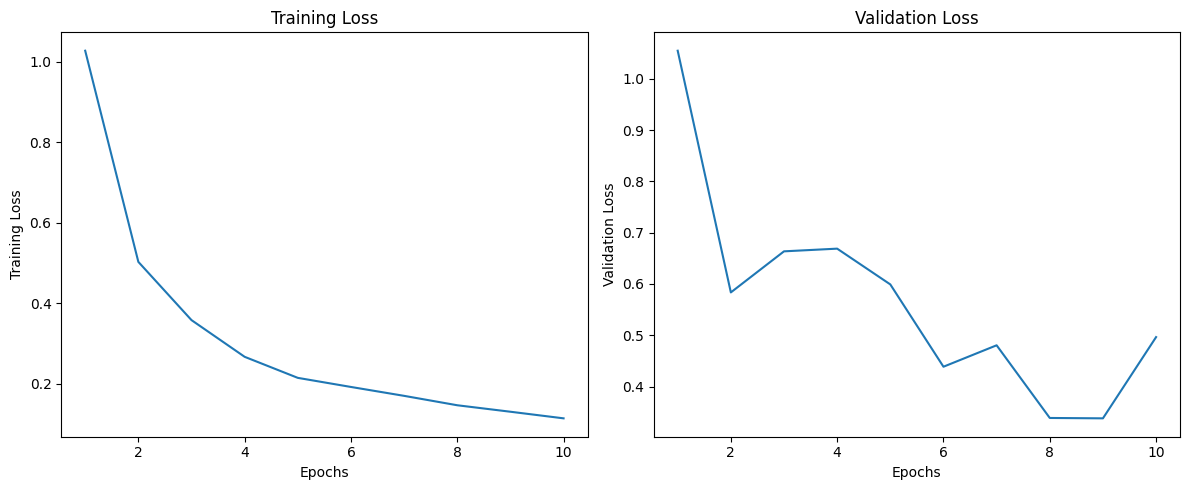

In [10]:
plot_loss(history)

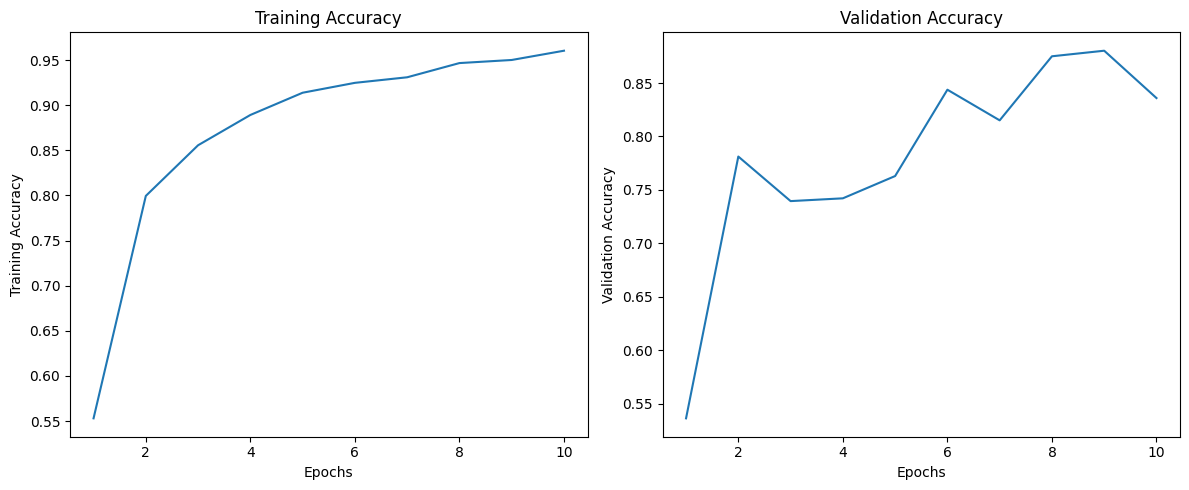

In [11]:
plot_accuracy(history)

## GoogLeNet

In [12]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')
    
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True
    
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1864: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1874: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/10
46/46 [==============================] - 42s 704ms/step - loss: 0.9755 - accuracy: 0.5661 - val_loss: 0.4724 - val_accuracy: 0.8464
Epoch 2/10
46/46 [==============================] - 27s 594ms/step - loss: 0.4025 - accuracy: 0.8344 - val_loss: 0.3032 - val_accuracy: 0.8906
Epoch 3/10
46/46 [==============================] - 28s 597ms/step - loss: 0.2782 - accuracy: 0.8891 - val_loss: 0.1728 - val_accuracy: 0.9453
Epoch 4/10
46/46 [==============================] - 28s 596ms/step - loss: 0.2384 - accuracy: 0.9021 - val_loss: 0.2393 - val_accuracy: 0.9219
Epoch 5/10
46/46 [==============================] - 28s 595ms/step - loss: 0.1699 - accuracy: 0.9418 - val_loss: 0.1917 - val_accuracy: 0.9297
Epoch 6/10
46/46 [==============================] - 28s 595ms/step - loss: 0.1483 - accuracy: 0.9466 - val_loss: 0.3167 - val_accuracy: 0.9323
Epoch 7/10
46/46 [==============================] - 28s 598ms/step - loss: 0.1529 - accuracy: 0.9432 - val_loss: 0.2139 - val_accuracy: 0.9427

In [15]:
model.save('ml_model_googlenet_new_proposed')

INFO:tensorflow:Assets written to: ml_model_googlenet_new_proposed\assets


INFO:tensorflow:Assets written to: ml_model_googlenet_new_proposed\assets


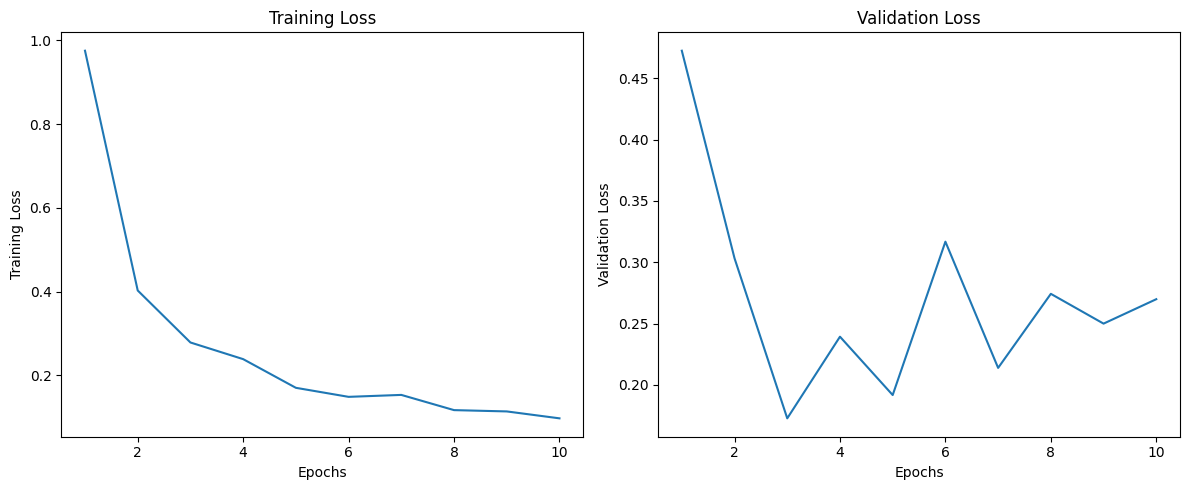

In [16]:
plot_loss(history)

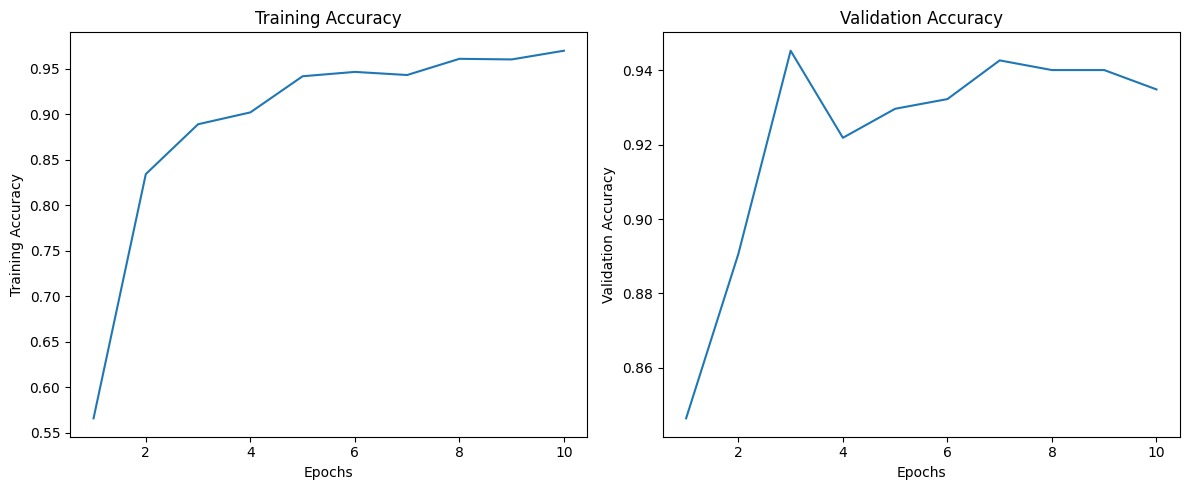

In [17]:
plot_accuracy(history)

## ResNet50

In [18]:
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=input_tensor,
    input_shape=(224, 224, 3),
    pooling='avg')

for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True
    
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

x = base_model.output
x = Dense(512, activation='relu')(x)
x = Dropout(.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',
             metrics=['accuracy'])

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
num_train = len(train_generator.filenames)
num_test = len(test_generator.filenames)

history = model.fit(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=10,
    verbose=1,
    validation_data=test_generator,
    validation_steps=num_test//batch_size)

C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1864: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "
C:\Users\maksym\anaconda3\envs\ml\lib\site-packages\keras\preprocessing\image.py:1874: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  "This ImageDataGenerator specifies "


Epoch 1/10
46/46 [==============================] - 38s 699ms/step - loss: 1.0447 - accuracy: 0.5455 - val_loss: 0.9744 - val_accuracy: 0.6068
Epoch 2/10
46/46 [==============================] - 30s 638ms/step - loss: 0.5864 - accuracy: 0.7584 - val_loss: 0.7843 - val_accuracy: 0.7370
Epoch 3/10
46/46 [==============================] - 32s 699ms/step - loss: 0.4471 - accuracy: 0.8104 - val_loss: 0.5896 - val_accuracy: 0.7865
Epoch 4/10
46/46 [==============================] - 32s 685ms/step - loss: 0.4091 - accuracy: 0.8289 - val_loss: 0.3724 - val_accuracy: 0.8542
Epoch 5/10
46/46 [==============================] - 30s 656ms/step - loss: 0.3683 - accuracy: 0.8439 - val_loss: 0.2843 - val_accuracy: 0.8932
Epoch 6/10
46/46 [==============================] - 29s 633ms/step - loss: 0.3737 - accuracy: 0.8439 - val_loss: 0.4372 - val_accuracy: 0.8776
Epoch 7/10
46/46 [==============================] - 33s 724ms/step - loss: 0.3012 - accuracy: 0.8706 - val_loss: 0.3215 - val_accuracy: 0.8802

In [21]:
model.save('ml_model_resnet50_new_proposed')

INFO:tensorflow:Assets written to: ml_model_resnet50_new_proposed\assets


INFO:tensorflow:Assets written to: ml_model_resnet50_new_proposed\assets


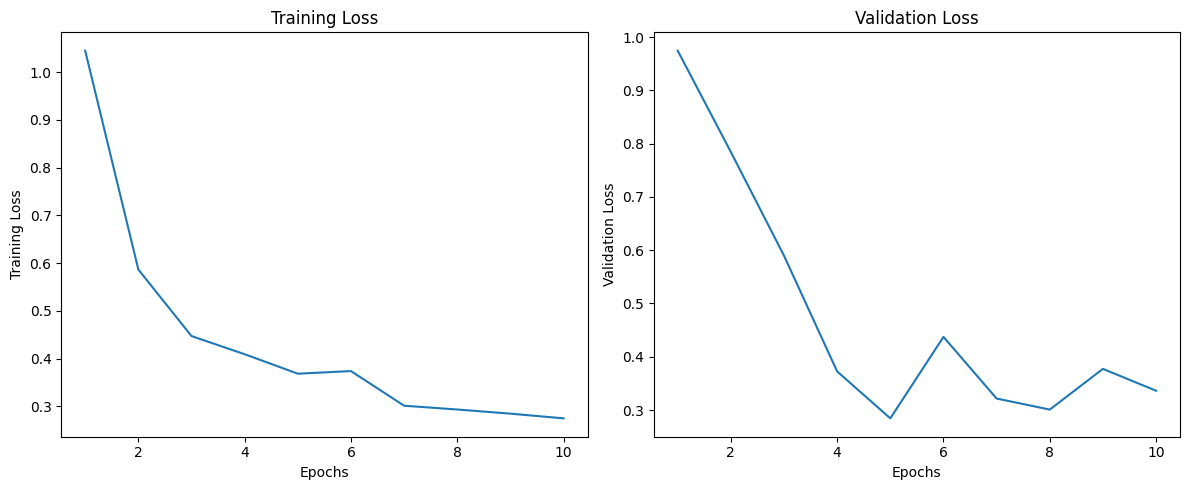

In [22]:
plot_loss(history)

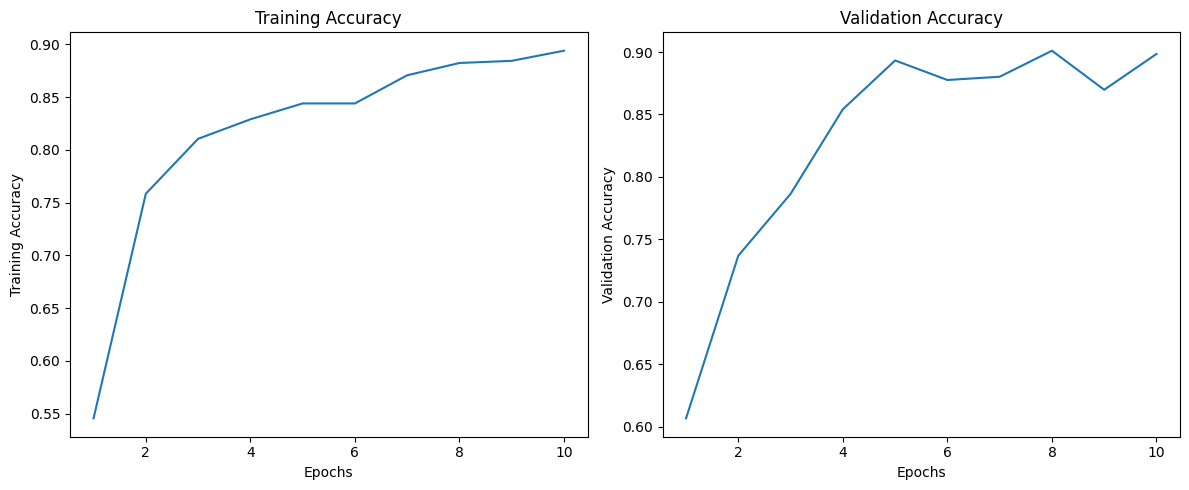

In [23]:
plot_accuracy(history)

## Ensemble the models

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Average
from tensorflow.keras.models import load_model

resnet_model = load_model('ml_model_resnet50_new_proposed/')
googlenet_model = load_model('ml_model_googlenet_new_proposed/')
mobilenet_model = load_model('ml_model_mobilenet_new_proposed/')

In [26]:
for layer in resnet_model.layers:
    layer.trainable = False

for layer in googlenet_model.layers:
    layer.trainable = False

for layer in mobilenet_model.layers:
    layer.trainable = False

In [32]:
input_tensor = Input(shape=(224, 224, 3))

resnet_output = resnet_model(input_tensor)
googlenet_output = googlenet_model(input_tensor)
mobilenet_output = mobilenet_model(input_tensor)

In [33]:
average_output = Average()([resnet_output, googlenet_output, mobilenet_output])

In [34]:
ensemble_model = tf.keras.Model(inputs=input_tensor, outputs=average_output)

ensemble_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

ensemble_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_2 (Functional)           (None, 4)            24638852    ['input_5[0][0]']                
                                                                                                  
 model_1 (Functional)           (None, 4)            22853924    ['input_5[0][0]']                
                                                                                                  
 model (Functional)             (None, 4)            2915908     ['input_5[0][0]']          

In [35]:
results = ensemble_model.evaluate(test_generator)
print("test loss, test acc:", results)

12/12 [==============================] - 9s 363ms/step - loss: 0.1902 - accuracy: 0.9505
test loss, test acc: [0.19023875892162323, 0.9505208134651184]
